In [1]:
!git clone https://github.com/tcl002/CSE151AProject.git

Cloning into 'CSE151AProject'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 41 (delta 4), reused 11 (delta 1), pack-reused 0
Receiving objects: 100% (41/41), 949.12 KiB | 7.59 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
pip install scikit-learn

In [3]:
pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


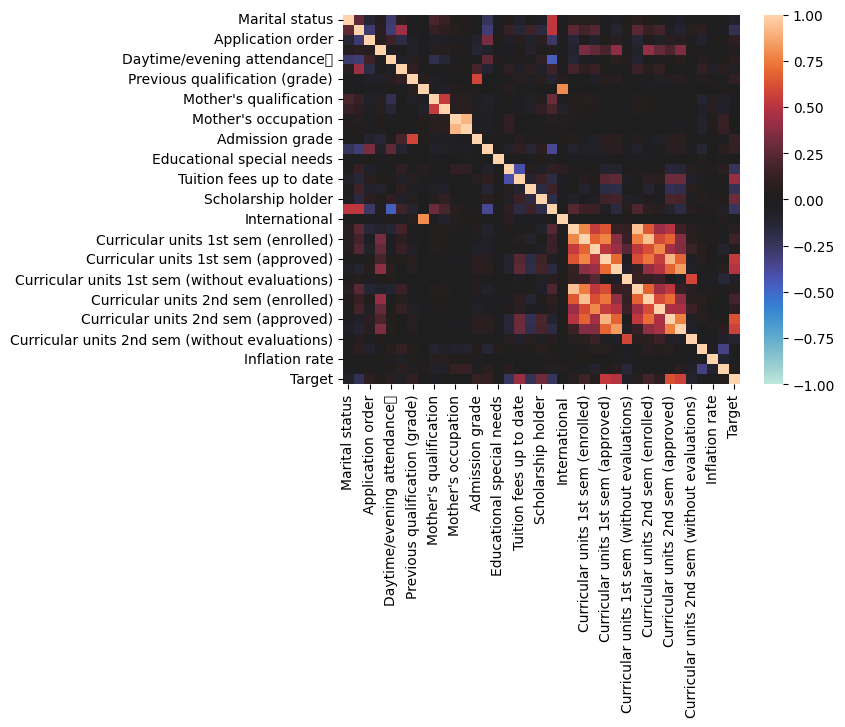

In [ ]:
df = pd.read_csv("CSE151AProject/dataset/data.csv", sep=';')

df["Target"].replace(['Dropout', 'Graduate', 'Enrolled'], [-1, 1, 0], inplace=True)


#print(df)
#print(df.shape)

#sns.heatmap(df[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]].corr(), annot=True, vmin=-1, vmax=1, center=0)
sns.heatmap(df.corr(), annot=False, vmin=-1, vmax=1, center=0)
df_copy = df

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


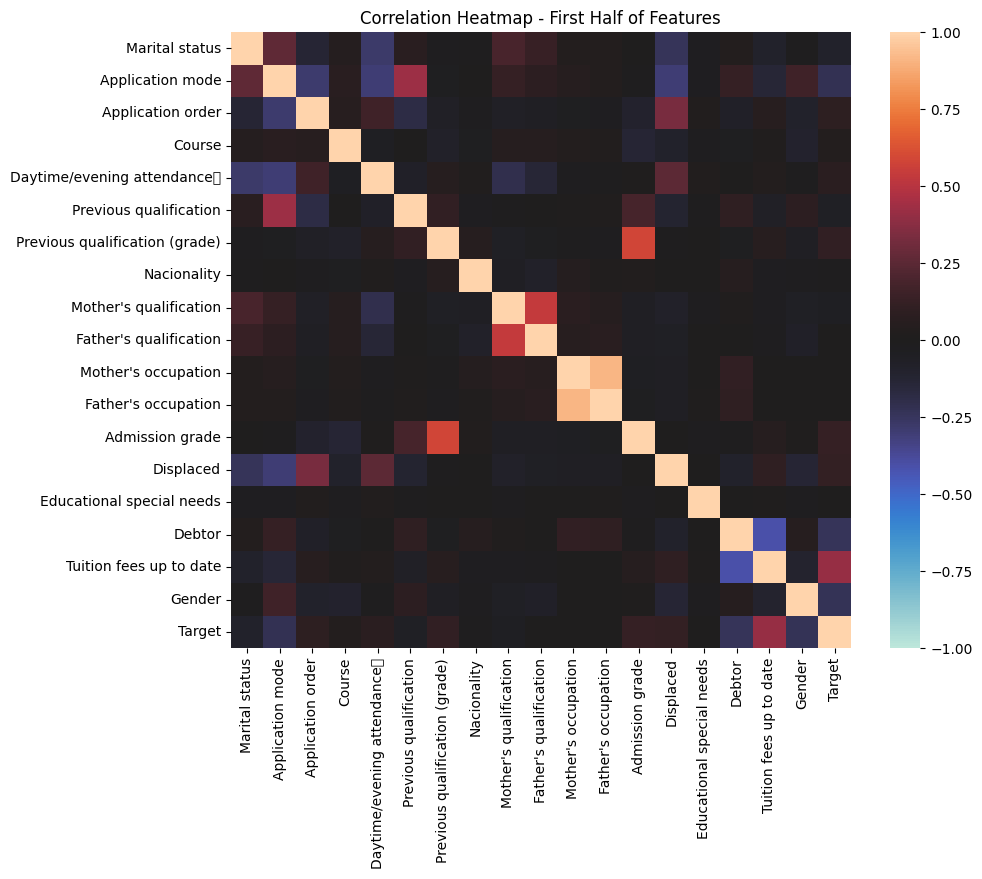

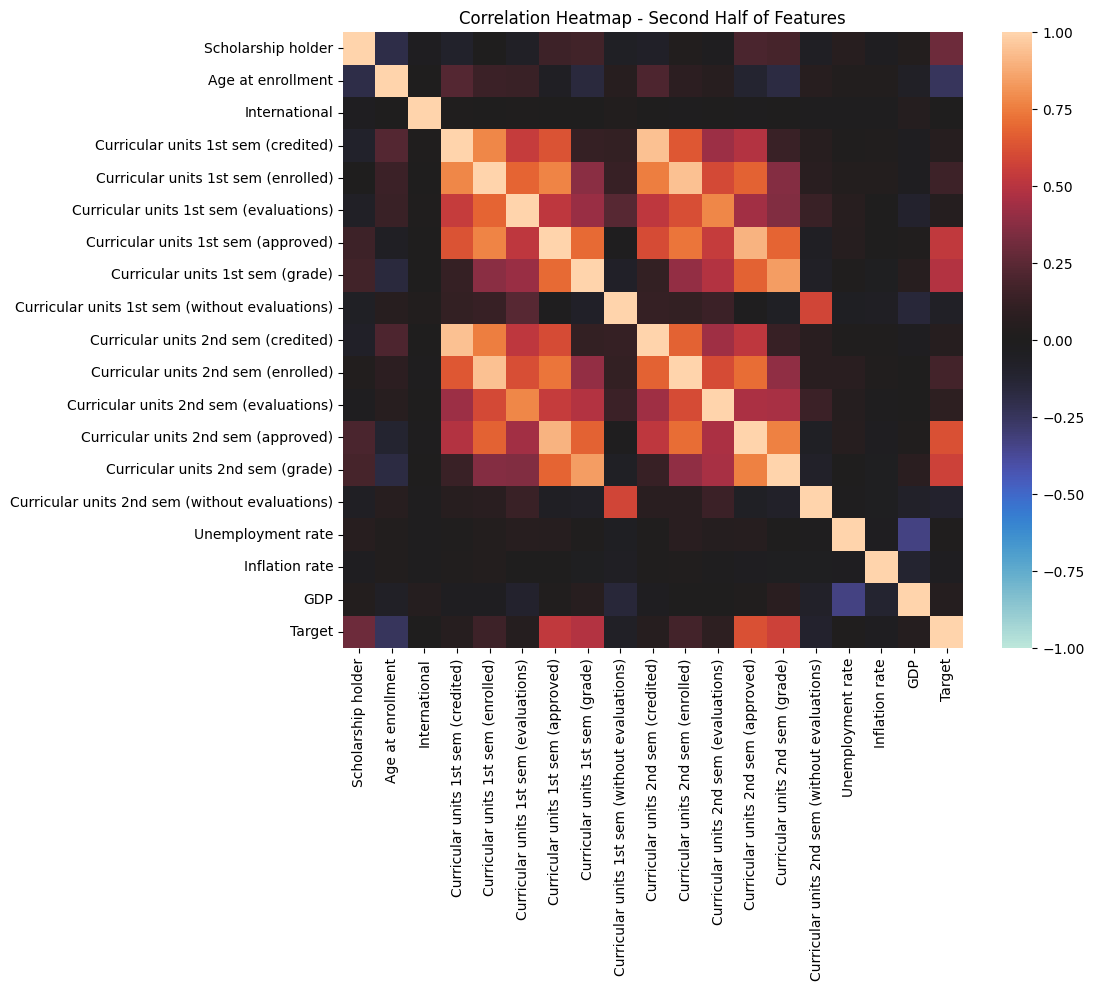

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataset and preprocessed it
# (e.g., replacing target labels with numerical values)

# Split the features into two groups
num_features = len(df.columns)
half_features = num_features // 2

# Select the first half of features
first_half_features = list(df.columns[:half_features]) + ['Target']

# Create a heatmap for the correlation between the first half of features and the target
plt.figure(figsize=(10, 8))
sns.heatmap(df[first_half_features].corr(), annot=False, vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap - First Half of Features")
plt.show()

# Select the second half of features
second_half_features = df.columns[half_features:]

# Create a heatmap for the correlation between the second half of features and the target
plt.figure(figsize=(10, 8))
sns.heatmap(df[second_half_features].corr(), annot=False, vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap - Second Half of Features")
plt.show()


There seems to be a linear correlation for (Scholarship holder, Age at enrollment, Curricucular units 1st sem(approved), Curricucular units 1st sem(graded), Curricucular units 2nd sem(approved), Curricucular units 2nd sem(graded),  Application mode,  Debtor, Tuition fees up to date, gender) to Target

In [ ]:
df['Target'].unique()

array([-1,  1,  0])

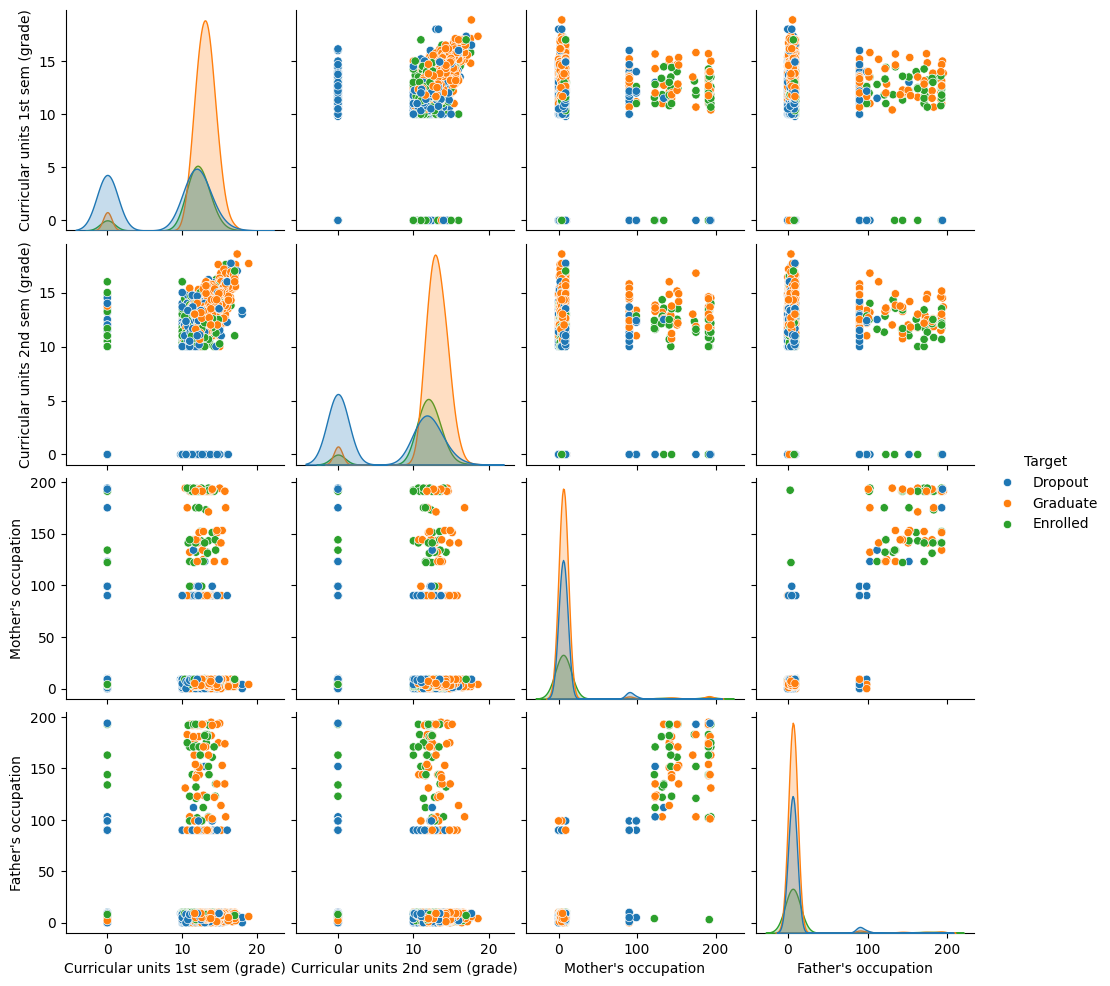

In [ ]:
sns.pairplot(df[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Target", "Mother's occupation", "Father's occupation"]], hue="Target")

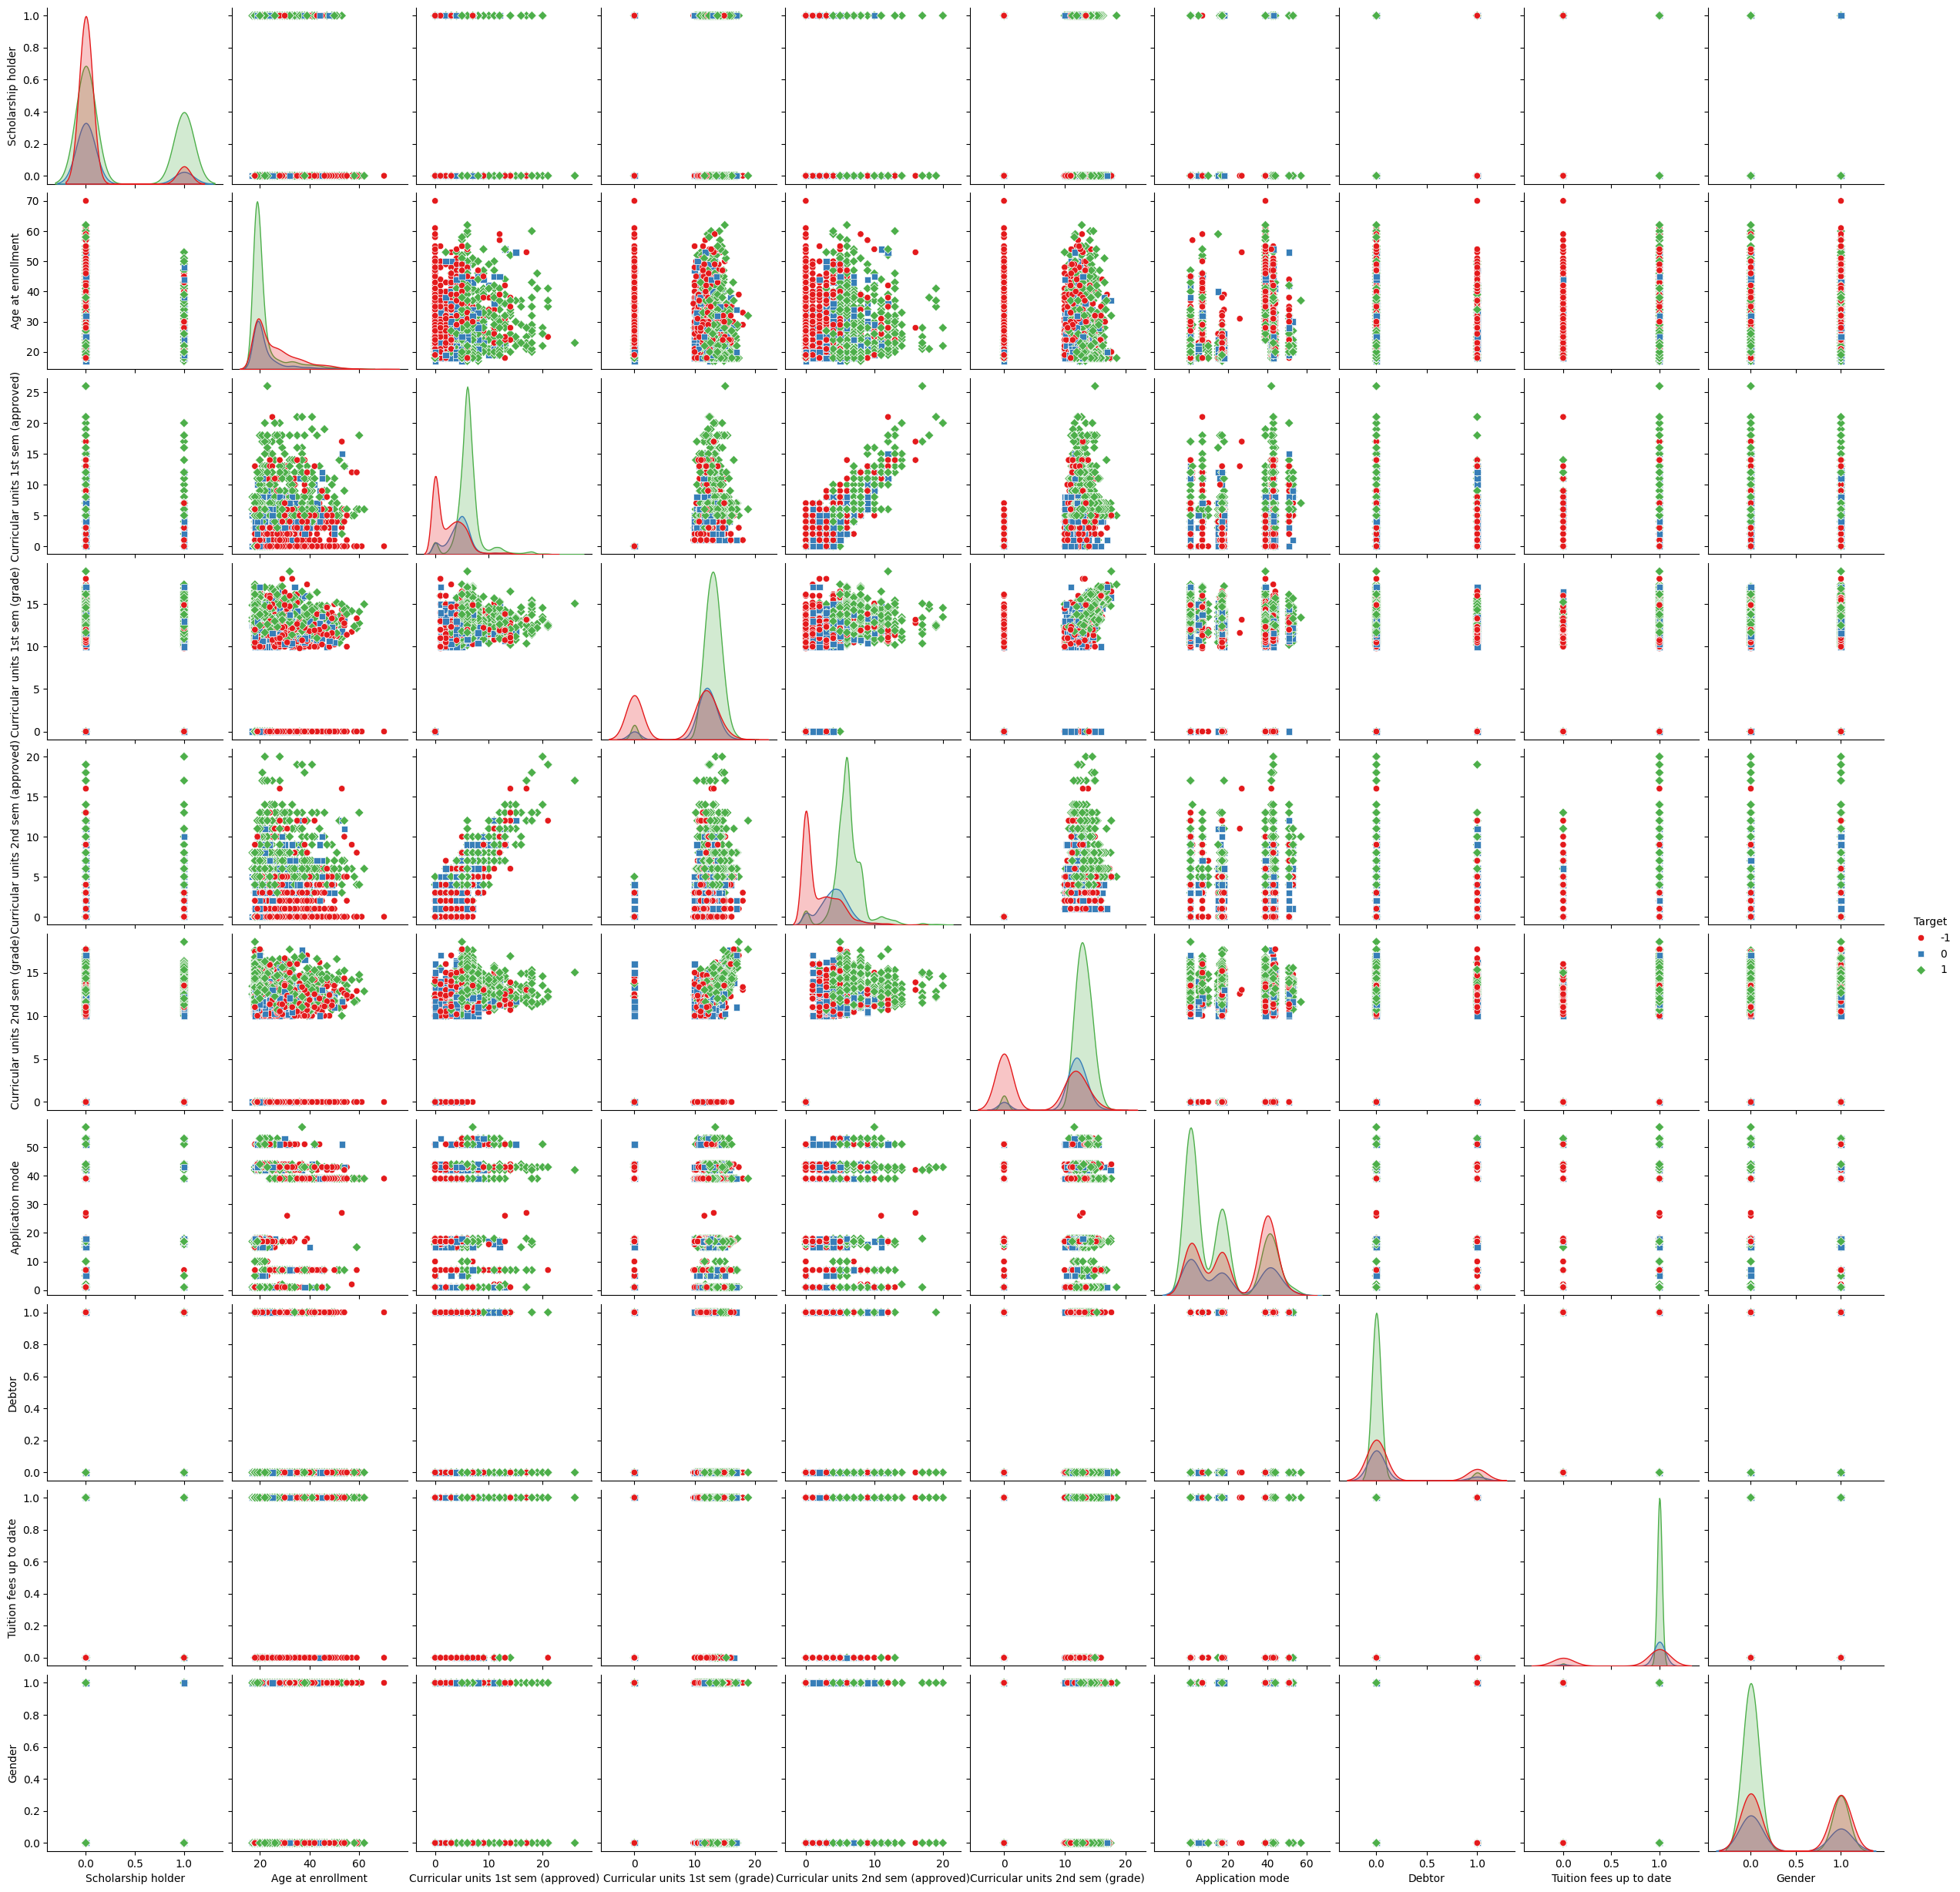

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# print(df_copy.columns)

# List of features to include in the pairplot
selected_features = [
    'Scholarship holder',
    'Age at enrollment',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Application mode',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Target'  # Include the target variable
]

# Create a DataFrame with the selected features
selected_data = df_copy[selected_features]

# Plot pairplot
sns.pairplot(selected_data, hue='Target', markers=["o", "s", "D"], palette="Set1")
plt.show()

In [ ]:
processed_df = df.drop(df[df['Curricular units 1st sem (grade)'] == 0].index)

#print(df[['Curricular units 1st sem (grade)']])
#print(processed_df[['Curricular units 1st sem (grade)']])

sns.histplot(processed_df[["Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)", "Target"]], x="Curricular units 1st sem (grade)", y="Target")

NameError: name 'df' is not defined